Dataset loaded successfully!
Shape: (1025, 14)

First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

=== Decision Tree ===
Train Accuracy: 1.0
Test Accuracy : 0.9707792207792207

Classification Report:
       

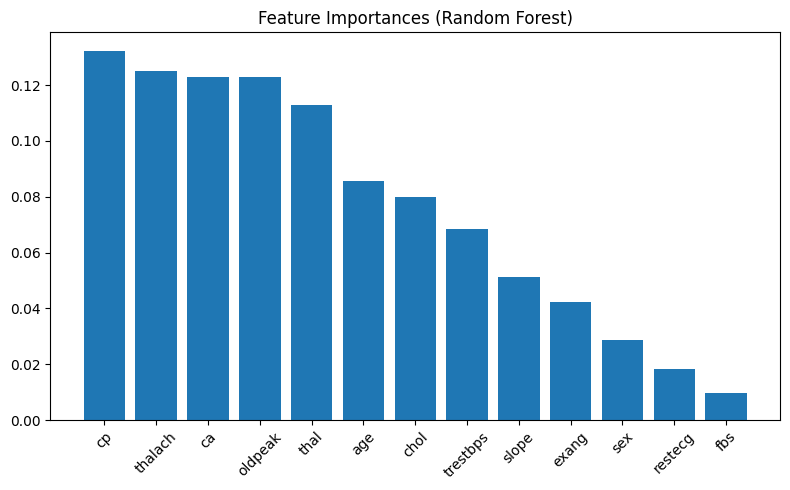


=== Cross-Validation Accuracy ===
Decision Tree mean CV accuracy : 1.0
Random Forest mean CV accuracy : 0.997

✅ All steps completed successfully!
Saved files: heart_tree.png, feature_importance.png


In [6]:
# ===============================================================
# Decision Tree & Random Forest on Heart Dataset (Kaggle)
# Tools: Scikit-learn, Graphviz, Matplotlib
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import graphviz

data = pd.read_csv("heart.csv")  

print("Dataset loaded successfully!")
print("Shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())
print(data.isnull().sum())

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train Decision Tree Classifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Prediction & evaluation
y_pred_tree = tree_clf.predict(X_test)
print("\n=== Decision Tree ===")
print("Train Accuracy:", accuracy_score(y_train, tree_clf.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


#  Visualize Decision Tree using Graphviz

export_graphviz(
    tree_clf,
    out_file="tree.dot",
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True
)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("heart_tree", format="png", cleanup=True)
print("\nDecision Tree visualization saved as 'heart_tree.png'")


shallow_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
shallow_tree.fit(X_train, y_train)

print("\n=== Shallow Tree (max_depth=4) ===")
print("Train Accuracy:", accuracy_score(y_train, shallow_tree.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, shallow_tree.predict(X_test)))


#  Train Random Forest and compare

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
print("\n=== Random Forest ===")
print("Train Accuracy:", accuracy_score(y_train, rf_clf.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()


# Cross-validation comparison

cv_tree = cross_val_score(tree_clf, X, y, cv=5)
cv_rf = cross_val_score(rf_clf, X, y, cv=5)

print("\n=== Cross-Validation Accuracy ===")
print("Decision Tree mean CV accuracy :", round(cv_tree.mean(), 3))
print("Random Forest mean CV accuracy :", round(cv_rf.mean(), 3))

print("\n✅ All steps completed successfully!")
print("Saved files: heart_tree.png, feature_importance.png")
